In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder


In [3]:
file_path = 'Employee.csv'
df = pd.read_csv(file_path)

In [5]:
print("Data Information:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [7]:
for col in df.columns:
    unique_vals = df[col].nunique()
    unique_list = df[col].unique()
    print(f"\nFeature: {col} | Unique Values: {unique_vals}")
    print(unique_list)


Feature: Company | Unique Values: 6
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Feature: Age | Unique Values: 29
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Feature: Salary | Unique Values: 40
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Feature: Place | Unique Values: 11
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Feature: Country | Unique Values: 1
['India']

Feature: Gender | Unique Values: 2
[0 1]


In [9]:
df.rename(columns={'Place': 'Location'}, inplace=True)

# Data Cleaning
print("\nMissing Values Before Treatment:")
print(df.isnull().sum())


Missing Values Before Treatment:
Company      8
Age         18
Salary      24
Location    14
Country      0
Gender       0
dtype: int64


In [13]:
df['Age'].replace(0, np.nan, inplace=True)

# Fill missing values with mean (for numerical columns)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


C:\Users\jouha\AppData\Local\Temp\ipykernel_20976\2110556253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)
C:\Users\jouha\AppData\Local\Temp\ipykernel_20976\2110556253.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

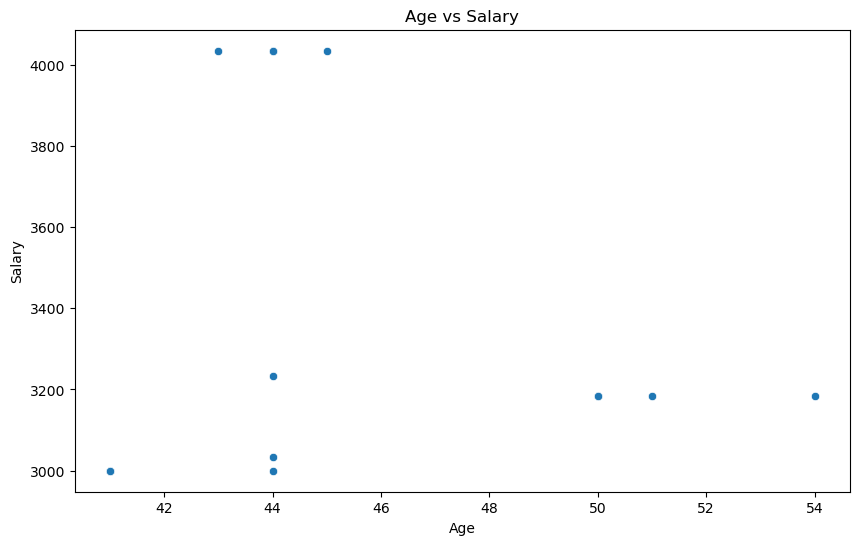

In [19]:
numeric_columns = df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Filter the dataframe to remove outliers based on IQR
df = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Data Analysis
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Plot age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

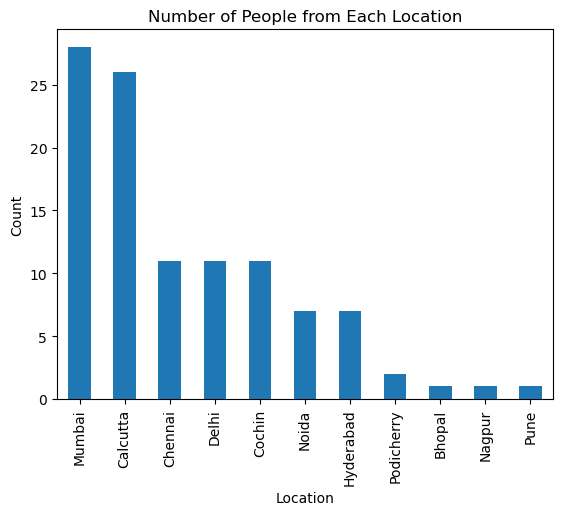

In [21]:
place_counts = df['Location'].value_counts()
place_counts.plot(kind='bar')
plt.title('Number of People from Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [23]:
# Data Encoding
# One-hot encoding for 'Company' and 'Location'
df_encoded = pd.get_dummies(df, columns=['Company', 'Location'])

# Label encoding for 'Country'
le = LabelEncoder()
df_encoded['Country_encoded'] = le.fit_transform(df['Country'])

# Feature Scaling
# StandardScaler
scaler = StandardScaler()
df_scaled_standard = scaler.fit_transform(df_encoded.select_dtypes(include=['float64', 'int64']))


In [25]:
minmax_scaler = MinMaxScaler()
df_scaled_minmax = minmax_scaler.fit_transform(df_encoded.select_dtypes(include=['float64', 'int64']))

print("\nData Preprocessing Completed Successfully.")


Data Preprocessing Completed Successfully.
